### Try-it 8.1: The "Best" Model

This module was all about regression and using Python's scikitlearn library to build regression models.  Below, a dataset related to real estate prices in California is given. While many of the assignments you have built and evaluated different models, it is important to spend some time interpreting the resulting "best" model.  


Your goal is to build a regression model to predict the price of a house in California.  After doing so, you are to *interpret* the model.  There are many strategies for doing so, including some built in methods from scikitlearn.  One example is `permutation_importance`.  Permutation feature importance is a strategy for inspecting a model and its features importance.  

Take a look at the user guide for `permutation_importance` [here](https://scikit-learn.org/stable/modules/permutation_importance.html).  Use  the `sklearn.inspection` modules implementation of `permutation_importance` to investigate the importance of different features to your regression models.  Share these results on the discussion board.

In [143]:
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE

In [145]:
import numpy as np
import matplotlib.pyplot as plt

In [147]:
cali = pd.read_csv('data/housing.csv')

In [149]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [151]:
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Feature Correlation Analysis

In [154]:
# Select the first 7 features and the target variable
correlation_features = cali[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_house_value']]

# Calculate the correlation matrix
correlation_matrix = correlation_features.corr()

# Extract the correlation of each feature with median_house_value
correlation_with_target = correlation_matrix['median_house_value']

# Display the correlations
print(correlation_with_target)

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_house_value    1.000000
Name: median_house_value, dtype: float64


#### Correlation Analysis Interpretation

Based on the correlation analysis results, here's a quick interpretation of each feature's relationship with `median_house_value`:

1. **Longitude (-0.046):** 
   - The weak negative correlation suggests that as you move further west (more negative longitude), there is a very slight decrease in median house values. 
   - However, the correlation is very close to zero, indicating almost no linear relationship between longitude and house value.

2. **Latitude (-0.144):** 
   - The moderate negative correlation suggests that as you move north (higher latitude), house values tend to decrease. 
   - This relationship is more noticeable than longitude's, but it's still not very strong.

3. **Housing Median Age (0.106):** 
   - There's a weak positive correlation here, indicating that areas with older housing tend to have slightly higher median house values. 
   - This might reflect established neighborhoods with higher property values.

4. **Total Rooms (0.134):** 
   - A weak positive correlation suggests that houses with more rooms tend to have higher median values. 
   - This is somewhat expected, as more rooms typically indicate larger or more valuable properties.

5. **Total Bedrooms (0.050):** 
   - The correlation is very weak and positive, indicating that the number of bedrooms has a minimal effect on house values. 
   - This could mean that beyond a certain point, additional bedrooms don’t significantly increase property value.

6. **Population (-0.025):** 
   - The near-zero negative correlation suggests almost no relationship between population size in an area and median house value. 
   - Population density might not be a strong factor influencing house prices in your dataset.

7. **Households (0.066):** 
   - A very weak positive correlation, indicating a slight tendency for areas with more households to have higher median house values, though this relationship is minimal.

#### Overall Interpretation:
- **Latitude** and **housing median age** show the most notable correlations with `median_house_value`, though they are still weak.
- **Longitude** and **population** show negligible relationships with house prices.
- None of the features have a strong linear relationship with house values, indicating that other factors might be more significant in determining house prices or that the relationships are more complex and non-linear.

For predictive modeling we will want to explore interactions between features or using more complex models that can capture non-linear relationships.


### Data Cleaning

In [158]:
#Examine the non numeric feature ocean_proximity
unique_values = cali['ocean_proximity'].unique()
print(unique_values)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [160]:
cali_encoded = pd.get_dummies(cali, columns=['ocean_proximity'], dtype=np.int8)
print(cali_encoded.shape)
print(cali_encoded.info())

(20640, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  int8   
 10  ocean_proximity_INLAND      20640 non-null  int8   
 11  ocean_proximity_ISLAND      20640 non-null  int8   
 12  ocean_proximity_NEAR BAY    20640 non-null  int8   
 13  ocean_proximity_NEA

In [162]:
null_values = cali_encoded.isnull().sum()
print(null_values)

cali_encoded_clean = cali_encoded.dropna()

null_values = cali_encoded_clean.isnull().sum()
print(null_values)

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64
longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64


In [176]:
cali_encoded_clean['lat_long'] = cali_encoded_clean['latitude'] * cali_encoded_clean['longitude']

/var/folders/7d/4cmb6lbj0pjgcc7xjnw7_mhr0000gn/T/ipykernel_53870/2562719908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cali_encoded_clean['lat_long'] = cali_encoded_clean['latitude'] * cali_encoded_clean['longitude']


### Regression Analysis

#### Recursive Feature Elimination

In [180]:
X = cali_encoded_clean.drop('median_house_value', axis=1)
y = cali_encoded_clean['median_house_value']

# Initialize the linear regression model
model = LinearRegression()

# Initialize RFE and specify the number of features to select (in this case, let's start with 1)
rfe = RFE(model, n_features_to_select=1)

# Fit RFE
rfe = rfe.fit(X, y)

# Print the ranking of features (1 indicates the best feature)
print("Feature Ranking:")
for i in range(X.shape[1]):
    print(f"{X.columns[i]}: {rfe.ranking_[i]}")

# You can also print the selected features
print("\nSelected Features:")
selected_features = X.columns[rfe.support_]
print(selected_features)

Feature Ranking:
longitude: 4
latitude: 5
housing_median_age: 10
total_rooms: 14
total_bedrooms: 11
population: 13
households: 12
median_income: 3
ocean_proximity_<1H OCEAN: 6
ocean_proximity_INLAND: 2
ocean_proximity_ISLAND: 1
ocean_proximity_NEAR BAY: 8
ocean_proximity_NEAR OCEAN: 7
lat_long: 9

Selected Features:
Index(['ocean_proximity_ISLAND'], dtype='object')


#### Simple Linear Regression

In [168]:
X = cali_encoded_clean[['median_income']]
y = cali_encoded_clean['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [170]:
test_mses = []

for i in range(1, 21):

    pipe = Pipeline([
        ('pfeat', PolynomialFeatures(degree=i, include_bias=False)),
        ('linreg', LinearRegression())
    ])
    
    #fit pipeline on training data
    pipe.fit(X_train, y_train)

    #mse of testing data
    test_preds = pipe.predict(X_test)
    test_mses.append(mean_squared_error(y_test, test_preds))

best_model_complexity = test_mses.index(min(test_mses)) + 1

# Answer check
print(best_model_complexity)
print(test_mses)

12
[6939589489.656916, 6897183944.69689, 6788846521.909938, 6786329864.004311, 6785483833.086062, 6777138527.829405, 6747799304.97053, 6746399682.927995, 6746306329.923568, 6744557849.850094, 6744334387.853163, 6744184640.957877, 6744457536.2990675, 6754317271.465192, 6795297413.572321, 6878740455.931805, 7007862232.902913, 7592194780.460241, 7850332708.679351, 8153448973.330329]


In [172]:
pipe = Pipeline([
        ('pfeat', PolynomialFeatures(degree=12, include_bias=False)),
        ('linreg', LinearRegression())
    ])
    
#fit pipeline on training data
pipe.fit(X_train, y_train)

predictions = pipe.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
print(mse)
print(rmse)
print(mae)

6744184640.957877
82122.98485173244
61249.3656439991


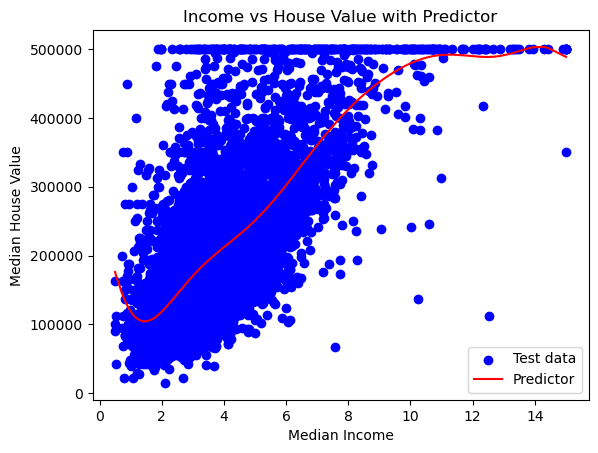

In [139]:
# Convert X_test to a NumPy array and sort the values for better plotting
X_test_array = X_test.values.ravel()  # Convert to 1D array
sort_order = np.argsort(X_test_array)

X_test_sorted = X_test_array[sort_order]
y_test_sorted = y_test.values[sort_order]  # Ensure y_test is sorted similarly
predictions_sorted = predictions[sort_order]  # Ensure predictions are sorted similarly

# Scatter plot of the actual data
plt.scatter(X_test_sorted, y_test_sorted, color='blue', label='Test data')

# Plot the regression line
plt.plot(X_test_sorted, predictions_sorted, color='red', label='Predictor')

# Adding labels and legend
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Income vs House Value with Predictor')
plt.legend()

# Show plot
plt.show()


#### Multiple Linear Regression

In [182]:
X = cali_encoded_clean[['median_income', 'latitude', 'longitude']]
y = cali_encoded_clean['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [184]:
test_mses = []

for i in range(1, 21):

    pipe = Pipeline([
        ('pfeat', PolynomialFeatures(degree=i, include_bias=False)),
        ('linreg', LinearRegression())
    ])
    
    #fit pipeline on training data
    pipe.fit(X_train, y_train)

    #mse of testing data
    test_preds = pipe.predict(X_test)
    test_mses.append(mean_squared_error(y_test, test_preds))

best_model_complexity = test_mses.index(min(test_mses)) + 1

# Answer check
print(best_model_complexity)
print(test_mses)

7
[5433319717.341561, 5171669667.289496, 5009420433.776549, 4644006083.740254, 4343534764.661318, 4398573076.231453, 4334675870.738328, 22896044509.430576, 4668205422.726692, 5122633292.911703, 19835023996.325684, 14437672019.216711, 25726012540.06956, 18073354494.09102, 10517074886.590153, 10592289919.174162, 11277854182.46022, 10832240298.278498, 4774472463.278306, 4805751634.022095]


In [186]:
pipe = Pipeline([
        ('pfeat', PolynomialFeatures(degree=7, include_bias=False)),
        ('linreg', LinearRegression())
    ])
    
#fit pipeline on training data
pipe.fit(X_train, y_train)

predictions = pipe.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
print(mse)
print(rmse)
print(mae)

4334675870.738328
65838.25537435153
46566.261179417495


Feature 0: 1.8538 ± 2.0935
Feature 1: 182.3810 ± 19.8671
Feature 2: 169.8947 ± 17.3347


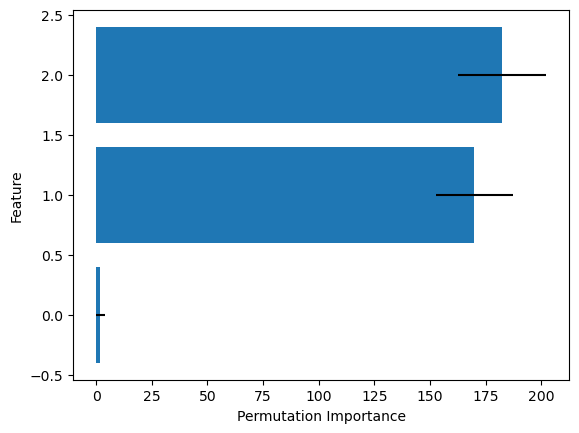

In [192]:
# Compute permutation importance
result = permutation_importance(pipe, X_test, y_test, n_repeats=10, random_state=22)

# Print feature importance
for i in range(X.shape[1]):
    print(f"Feature {i}: {result.importances_mean[i]:.4f} ± {result.importances_std[i]:.4f}")

sorted_idx = result.importances_mean.argsort()
plt.barh(range(X.shape[1]), result.importances_mean[sorted_idx], xerr=result.importances_std[sorted_idx])
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.show()

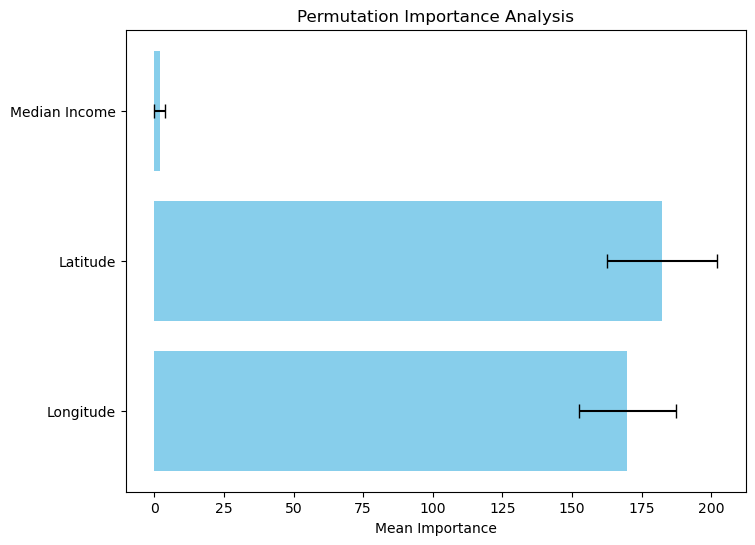

In [196]:
# Data for the chart
features = ['Median Income', 'Latitude', 'Longitude']
importances = [1.8538, 182.3810, 169.8947]
errors = [2.0935, 19.8671, 17.3347]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.barh(features, importances, xerr=errors, color='skyblue', capsize=5)

# Add titles and labels
plt.xlabel('Mean Importance')
plt.title('Permutation Importance Analysis')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top

# Show the plot
plt.show()